# Does the Tourism Preferences Changes after COVID19?

## CASA0013: Foundations of Spatial Data Science

### Student Ids: ucfnjji, ucfnlun, ucfnpar, ucfnrli.

## Importing Modules

In [ ]:
# Import required libraries

# Import visualisation modules
import matplotlib as mpl 
%matplotlib inline 
import matplotlib.pyplot as plt 

#Import modules
import osmnx as ox
import pandas as pd
import geopandas as gpd
import numpy as np
import contextily as ctx

#Import datareading modules
import fiona
import urllib
from urllib.request import urlopen
import csv
import os
import tempfile
import shutil
from pathlib import Path

import warnings 
warnings.simplefilter(action='ignore')
ox.__version__

'1.2.2'

## Data and Pre-processing
Our project topic is about Tourism Development.
References:

Research question:

Scope of Work:

Our data includes:
1. Airbnb listing Data Year of from [Inside Airbnb website]()
2. Airbnb Listing Data Year of from [Inside Airbnb website]()
2. Tourism Attraction Data which is scrapped from [OpenStreetMap]()
3. Greenspace Data from [Ordnance Survey]()
4. Population Data from [Office of National Statistics (ONS) UK Government]()


### Population Density Data

#### Accesssing Population Density Data

#### Population Density Data Wrangling

### Tourism Attraction Data

#### Scrapping Tourism Attraction Data
We followed the instruction from this [tutorial]() to scrap tourism attraction Point of Interest(POI)s from OpenStreetMap website. 

The notebook demonstrates the process of gathering local amenity data from OpenStreetMap. Local amenity data of this sort could be used to improve the accuracy of a whole range of ML models. In this notebook, the idea is that that presence of these amenities could help us predict what an AirBnb host might charge.

The notebook covered "How to make basic requests from OpenStreetMap using OSMnx", -author.

In [ ]:
# Set up query
query = {'tourism':'attraction'}

# Run query
# Jin: I change ox.pois.pois_from_place to ox.geometries.geometries_from_place, for the adjustment of osmnx version change.
# details: https://stackoverflow.com/questions/71559143/what-happened-to-the-pois-module-in-osmnx-and-what-to-use-now
tourist_attraction = ox.geometries.geometries_from_place(
            'Greater London, UK',
            tags = query,
            which_result=1)

tourist_attraction.head(5)

historic                      name     tourism  \
element_type osmid                                                       
node         25524252   building           Blewcoat School  attraction   
             26559743        NaN                       NaN  attraction   
             252602371       NaN  London Bridge Experience  attraction   
             269236138       NaN      Little Holland House  attraction   
             293221901       NaN    Hall Place and Gardens  attraction   

                        wikidata                        wikipedia  \
element_type osmid                                                  
node         25524252   Q4926413               en:Blewcoat School   
             26559743        NaN                              NaN   
             252602371  Q7748032  en:The London Bridge Experience   
             269236138       NaN                              NaN   
             293221901  Q5642615                              NaN   

                                         geometry access barrier bicycle  \
element_type osmid                                                         
node         25524252   POINT (-0.13606 51.49830)    NaN     NaN     NaN   
             26559743   POINT (-0.14525 51.39520)    NaN     NaN     NaN   
             252602371  POINT (-0.08826 51.50639)    NaN     NaN     NaN   
             269236138  POINT (-0.17065 51.35530)    NaN     NaN     NaN   
             293221901   POINT (0.16023 51.44819)    NaN     NaN     NaN   

                       place  ... int_name source:description name:ban  \
element_type osmid            ...                                        
node         25524252    NaN  ...      NaN                NaN      NaN   
             26559743    NaN  ...      NaN                NaN      NaN   
             252602371   NaN  ...      NaN                NaN      NaN   
             269236138   NaN  ...      NaN                NaN      NaN   
             293221901   NaN  ...      NaN                NaN      NaN   

                       name:eo name:hak name:mai name:pms name:tl name:sw  \
element_type osmid                                                          
node         25524252      NaN      NaN      NaN      NaN     NaN     NaN   
             26559743      NaN      NaN      NaN      NaN     NaN     NaN   
             252602371     NaN      NaN      NaN      NaN     NaN     NaN   
             269236138     NaN      NaN      NaN      NaN     NaN     NaN   
             293221901     NaN      NaN      NaN      NaN     NaN     NaN   

                       name:xmf  
element_type osmid               
node         25524252       NaN  
             26559743       NaN  
             252602371      NaN  
             269236138      NaN  
             293221901      NaN  

[5 rows x 359 columns]

In [ ]:
print(f"Data frame is {tourist_attraction.shape[0]:,} x {tourist_attraction.shape[1]}")

Data frame is 344 x 359


#### Tourism Attraction Data Wrangling

In [ ]:
# Exploring the data structure and attributes
tourist_attraction.info(verbose=True)

<class 'geopandas.geodataframe.GeoDataFrame'>
MultiIndex: 344 entries, ('node', 25524252) to ('relation', 12942436)
Data columns (total 359 columns):
 #    Column                                  Dtype   
---   ------                                  -----   
 0    historic                                object  
 1    name                                    object  
 2    tourism                                 object  
 3    wikidata                                object  
 4    wikipedia                               object  
 5    geometry                                geometry
 6    access                                  object  
 7    barrier                                 object  
 8    bicycle                                 object  
 9    place                                   object  
 10   foot                                    object  
 11   addr:street                             object  
 12   layer                                   object  
 13   level              

In [ ]:
# Selecting variables needed
tourism_attraction = tourist_attraction[["name", "tourism", "geometry"]]

# Checking the data
tourism_attraction.head(5)

name     tourism  \
element_type osmid                                             
node         25524252            Blewcoat School  attraction   
             26559743                        NaN  attraction   
             252602371  London Bridge Experience  attraction   
             269236138      Little Holland House  attraction   
             293221901    Hall Place and Gardens  attraction   

                                         geometry  
element_type osmid                                 
node         25524252   POINT (-0.13606 51.49830)  
             26559743   POINT (-0.14525 51.39520)  
             252602371  POINT (-0.08826 51.50639)  
             269236138  POINT (-0.17065 51.35530)  
             293221901   POINT (0.16023 51.44819)

In [ ]:
# Identifying NA values in rows of 'name' attribute
tourism_attraction[tourism_attraction.name.isna()]

name     tourism  \
element_type osmid                          
node         26559743     NaN  attraction   
             320446994    NaN  attraction   
             4189248446   NaN  attraction   
             4382359536   NaN  attraction   
             4395971090   NaN  attraction   
             5263136422   NaN  attraction   
             6344035585   NaN  attraction   
             6359405651   NaN  attraction   
             6447075569   NaN  attraction   
             10046275960  NaN  attraction   
way          520139095    NaN  attraction   
             851874002    NaN  attraction   
             851874003    NaN  attraction   

                                                                   geometry  
element_type osmid                                                           
node         26559743                             POINT (-0.14525 51.39520)  
             320446994                            POINT (-0.18974 51.56601)  
             4189248446                           POINT (-0.13182 51.51099)  
             4382359536                           POINT (-0.00712 51.53556)  
             4395971090                           POINT (-0.12517 51.50665)  
             5263136422                           POINT (-0.26097 51.62773)  
             6344035585                           POINT (-0.20505 51.51787)  
             6359405651                           POINT (-0.30643 51.44514)  
             6447075569                           POINT (-0.09701 51.51678)  
             10046275960                          POINT (-0.14002 51.51121)  
way          520139095    POLYGON ((-0.18728 51.56813, -0.18753 51.56847...  
             851874002    LINESTRING (-0.16136 51.47601, -0.16132 51.475...  
             851874003    LINESTRING (-0.16133 51.47567, -0.16124 51.475...

In [ ]:
# Counting the NA values
tourism_attraction.isnull().sum(axis=0).sort_values(ascending=False)[:12]

name        13
tourism      0
geometry     0
dtype: int64

We treat NA values as a real tourism attraction, so we decided keep the tourism attraction without a name.

In [ ]:
# Keeping the first duplicate row
tourism_df = tourism_attraction.drop_duplicates(['name'])
tourism_df

name     tourism  \
element_type osmid                                             
node         25524252            Blewcoat School  attraction   
             26559743                        NaN  attraction   
             252602371  London Bridge Experience  attraction   
             269236138      Little Holland House  attraction   
             293221901    Hall Place and Gardens  attraction   
...                                          ...         ...   
relation     7220431                    Kew Pond  attraction   
             8048634              Chiswick House  attraction   
             8244923          Little Dean's Yard  attraction   
             8250949           Piccadilly Circus  attraction   
             12942436            Wembley Stadium  attraction   

                                                                 geometry  
element_type osmid                                                         
node         25524252                           POINT (-0.13606 51.49830)  
             26559743                           POINT (-0.14525 51.39520)  
             252602371                          POINT (-0.08826 51.50639)  
             269236138                          POINT (-0.17065 51.35530)  
             293221901                           POINT (0.16023 51.44819)  
...                                                                   ...  
relation     7220431    POLYGON ((-0.28578 51.48458, -0.28557 51.48482...  
             8048634    POLYGON ((-0.25857 51.48363, -0.25861 51.48360...  
             8244923    POLYGON ((-0.12759 51.49840, -0.12763 51.49825...  
             8250949    POLYGON ((-0.13466 51.50974, -0.13472 51.50982...  
             12942436   POLYGON ((-0.28036 51.55725, -0.28025 51.55727...  

[317 rows x 3 columns]

We decided to drop the duplicate tourism attraction and keep the first row of all duplication by 'name attributes.

### Greenspace Data
Greenspace data is downloaded from Ordnance Survey website with selection in 4 tiles that covers all London areas, which are:
1. SP
2. SU
3. TL
4. TQ

Using QGIS, we merged the tiles and we pushed the merged data that is ready to be pre-processed on the [github link](https://github.com/JinJiang22/fsds_GroupWork/blob/main/data/OS_Open_Greenspace/greenspace_merged.gpkg) in GeoPackage format

#### Accessing greenspace data
Since the data is in GeoPackage format, we have to cache our data first.

In [ ]:
#Caching the data
import os
from requests import get
from urllib.parse import urlparse

def cache_data(src:str, dest:str) -> str:
    """
    
    cache_data
    
    
    """    
    url = urlparse(src) # We assume that this is some kind of valid URL 
    fn  = os.path.split(url.path)[-1] # Extract the filename
    dfn = os.path.join(dest,fn) # Destination filename
    
    if not os.path.isfile(dfn):
        
        print(f"{dfn} not found, downloading!")

        path = os.path.split(dest)
        
        if len(path) >= 1 and path[0] != '':
            os.makedirs(os.path.join(*path), exist_ok=True)
            
        with open(dfn, "wb") as file:
            response = get(src)
            file.write(response.content)
            
        print("\tDone downloading...")

    else:
        print(f"Found {dfn} locally!")

    return dfn

help(cache_data) # <- This should show the docstring you've written

Help on function cache_data in module __main__:

cache_data(src: str, dest: str) -> str
    cache_data



In [ ]:
# Accessing the greenspace_merged.gpkg
ddir  = os.path.join('data') # destination directory
spath = 'https://github.com/JinJiang22/fsds_GroupWork/blob/main/data/OS_Open_Greenspace/' # source path

greenspace_gdf = gpd.read_file( cache_data(spath+'greenspace_merged.gpkg?raw=true', ddir) )

print('Done.')

Found data/greenspace_merged.gpkg locally!
Done.


#### Greenspace Data Wrangling

In [ ]:
greenspace_gdf.info(verbose=True)

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 49739 entries, 0 to 49738
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   id         49739 non-null  object  
 1   function   49739 non-null  object  
 2   distName1  13087 non-null  object  
 3   distName2  46 non-null     object  
 4   distName3  1 non-null      object  
 5   distName4  0 non-null      object  
 6   layer      49739 non-null  object  
 7   path       49739 non-null  object  
 8   geometry   49739 non-null  geometry
dtypes: geometry(1), object(8)
memory usage: 3.4+ MB


In [ ]:
# Exploring at the data structure and attributes
greenspace_gdf.head()

,id,function,distName1,distName2,distName3,distName4,layer,path,geometry
0,E56DE74A-4CE2-13A9-E053-AAEFA00A0D0E,Playing Field,None,None,None,None,SP_GreenspaceSite,/Users/listianingrumr/Documents/CASA/FSDS/fsds...,"MULTIPOLYGON Z (((492957.940 289585.690 0.000,..."
1,E56DE74A-4BB9-13A9-E053-AAEFA00A0D0E,Allotments Or Community Growing Spaces,None,None,None,None,SP_GreenspaceSite,/Users/listianingrumr/Documents/CASA/FSDS/fsds...,"MULTIPOLYGON Z (((492218.690 289828.830 0.000,..."
2,E56DE843-A69A-13A9-E053-AAEFA00A0D0E,Play Space,None,None,None,None,SP_GreenspaceSite,/Users/listianingrumr/Documents/CASA/FSDS/fsds...,"MULTIPOLYGON Z (((492475.190 289982.670 0.000,..."
3,E56DE6CA-44B8-13A9-E053-AAEFA00A0D0E,Play Space,None,None,None,None,SP_GreenspaceSite,/Users/listianingrumr/Documents/CASA/FSDS/fsds...,"MULTIPOLYGON Z (((492391.360 289988.480 0.000,..."
4,E56DE848-686E-13A9-E053-AAEFA00A0D0E,Play Space,None,None,None,None,SP_GreenspaceSite,/Users/listianingrumr/Documents/CASA/FSDS/fsds...,"MULTIPOLYGON Z (((493020.640 290076.310 0.000,..."


In [ ]:
# Identifying NA values in rows of function
greenspace_gdf[greenspace_gdf.function.isna()]

,id,function,distName1,distName2,distName3,distName4,layer,path,geometry


As we can see from above, there is no NA values in this data because this data is already selected and cleaned by Ordnance Survey.

In [ ]:
# Take a look at the data
greenspace_gdf.head(5)

,id,function,distName1,distName2,distName3,distName4,layer,path,geometry
0,E56DE74A-4CE2-13A9-E053-AAEFA00A0D0E,Playing Field,None,None,None,None,SP_GreenspaceSite,/Users/listianingrumr/Documents/CASA/FSDS/fsds...,"MULTIPOLYGON Z (((492957.940 289585.690 0.000,..."
1,E56DE74A-4BB9-13A9-E053-AAEFA00A0D0E,Allotments Or Community Growing Spaces,None,None,None,None,SP_GreenspaceSite,/Users/listianingrumr/Documents/CASA/FSDS/fsds...,"MULTIPOLYGON Z (((492218.690 289828.830 0.000,..."
2,E56DE843-A69A-13A9-E053-AAEFA00A0D0E,Play Space,None,None,None,None,SP_GreenspaceSite,/Users/listianingrumr/Documents/CASA/FSDS/fsds...,"MULTIPOLYGON Z (((492475.190 289982.670 0.000,..."
3,E56DE6CA-44B8-13A9-E053-AAEFA00A0D0E,Play Space,None,None,None,None,SP_GreenspaceSite,/Users/listianingrumr/Documents/CASA/FSDS/fsds...,"MULTIPOLYGON Z (((492391.360 289988.480 0.000,..."
4,E56DE848-686E-13A9-E053-AAEFA00A0D0E,Play Space,None,None,None,None,SP_GreenspaceSite,/Users/listianingrumr/Documents/CASA/FSDS/fsds...,"MULTIPOLYGON Z (((493020.640 290076.310 0.000,..."


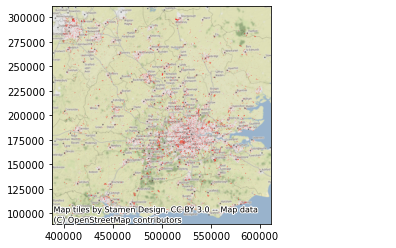

In [ ]:
# Plot greenspace geometry
ax = greenspace_gdf.plot(alpha=0.5, color='red');
# Add background map, expressing target CRS so the basemap can be
# reprojected (warped)
ctx.add_basemap(ax, crs=greenspace_gdf.crs)

### London Ward Data

#### Accessing London Ward Data

In [ ]:
ddir  = os.path.join('data') # destination directory
spath = 'https://github.com/JinJiang22/fsds_GroupWork/blob/main/data/' # source path

londonward = gpd.read_file( cache_data(spath+'londonward.gpkg?raw=true', ddir) )

print('Done.')

Found data/londonward.gpkg locally!
Done.


In [ ]:
# Take a look at the London Ward data
londonward.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 657 entries, 0 to 656
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   NAME        657 non-null    object  
 1   GSS_CODE    657 non-null    object  
 2   DISTRICT    657 non-null    object  
 3   LAGSSCODE   657 non-null    object  
 4   HECTARES    657 non-null    float64 
 5   NONLD_AREA  657 non-null    float64 
 6   geometry    657 non-null    geometry
dtypes: float64(2), geometry(1), object(4)
memory usage: 36.1+ KB


In [ ]:
londonward.head(5)

,NAME,GSS_CODE,DISTRICT,LAGSSCODE,HECTARES,NONLD_AREA,geometry
0,Chessington South,E05000405,Kingston upon Thames,E09000021,755.173,0.0,"MULTIPOLYGON (((516401.596 160201.802, 516407...."
1,Tolworth and Hook Rise,E05000414,Kingston upon Thames,E09000021,259.464,0.0,"MULTIPOLYGON (((519552.998 164295.600, 519508...."
2,Berrylands,E05000401,Kingston upon Thames,E09000021,145.390,0.0,"MULTIPOLYGON (((518107.499 167303.399, 518114...."
3,Alexandra,E05000400,Kingston upon Thames,E09000021,268.506,0.0,"MULTIPOLYGON (((520336.700 165105.498, 520332...."
4,Beverley,E05000402,Kingston upon Thames,E09000021,187.821,0.0,"MULTIPOLYGON (((521201.203 169275.505, 521204...."


<AxesSubplot:>

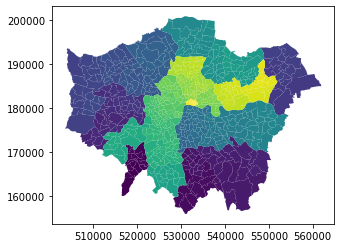

In [ ]:
# Plot the London Ward boundary to check
londonward.plot(cmap='viridis')

## Data Processing

### Tourism Attraction Data

#### Clipping the Tourism Attraction Data

In [ ]:
# check if they are in the same crs
print("tourism attraction crs:", tourism_df.crs)
print("londonward crs:", londonward.crs)

tourism attraction crs: epsg:4326
londonward crs: epsg:27700


In [ ]:
# Transform the data into projected crs EPSG:27700 (British National Grid)
tourism_attract = tourism_df.to_crs(epsg=27700)

In [ ]:
tourism_attract.head(5)

name     tourism  \
element_type osmid                                             
node         25524252            Blewcoat School  attraction   
             26559743                        NaN  attraction   
             252602371  London Bridge Experience  attraction   
             269236138      Little Holland House  attraction   
             293221901    Hall Place and Gardens  attraction   

                                             geometry  
element_type osmid                                     
node         25524252   POINT (529481.011 179353.082)  
             26559743   POINT (529134.041 167872.849)  
             252602371  POINT (532775.283 180338.459)  
             269236138  POINT (527477.497 163391.245)  
             293221901  POINT (550210.279 174346.124)

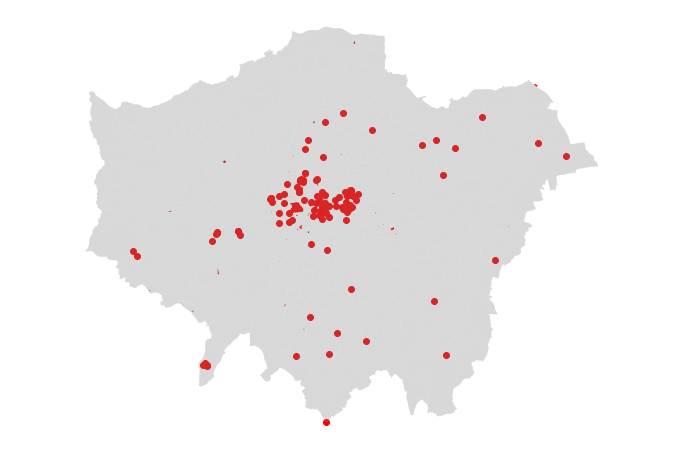

In [ ]:
# Plot the data
fig, ax = plt.subplots(figsize=(12, 8))

tourism_attract.plot(alpha=1,
                        color="red",
                         ax=ax,
                    )

londonward.plot(color='grey',
                       ax=ax,
                       alpha=.3,
                    )

plt.axis('equal')
ax.set_axis_off()
plt.show()

In [ ]:
# Clip the data using GeoPandas clip
tourism_clip = gpd.clip(tourism_attract, londonward)

# View the first 5 rows and a few select columns
tourism_clip.head()

,,name,tourism,geometry
element_type,osmid,,,
node,7574982627,Southernmost Point of Gtr London,attraction,POINT (530898.802 155854.283)
way,825382682,The Brixton Windmill,attraction,"POLYGON ((530457.769 174364.012, 530458.467 17..."
node,5411143721,Thames River Cruises,attraction,POINT (530487.954 179007.805)
way,118720812,"St John's, Smith Square",attraction,"POLYGON ((530109.956 179125.586, 530119.242 17..."
relation,8244923,Little Dean's Yard,attraction,"POLYGON ((530066.731 179362.979, 530028.824 17..."


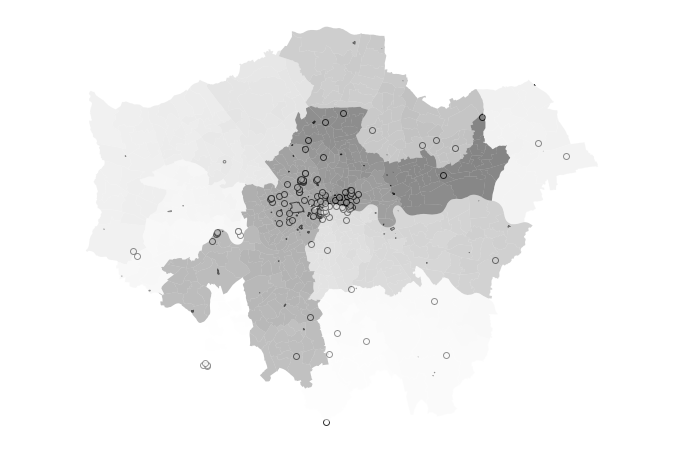

In [ ]:
# Plot the clipped data
fig, ax = plt.subplots(figsize=(12, 8))

tourism_clip.plot(alpha=.8,
                         color="white",
                         edgecolor="black",
                         ax=ax)

londonward.plot(cmap="Greys",
                       ax=ax,
                       alpha=.5)

ax.set_axis_off()
plt.axis('equal')

plt.show()

#### Calculating the Tourism Attraction Centroid

In [ ]:
# Calculating centroid of tourism attraction polygon and multipolygon

from shapely.geometry.polygon import Polygon
from shapely.geometry.multipolygon import MultiPolygon

tourism_centroid = tourism_clip

tourism_clip['geometry'] = tourism_clip['geometry'].apply(
  lambda x: x.centroid if type(x) == Polygon else (
  x.centroid if type(x) == MultiPolygon else x)
)

tourism_centroid.head(5)

,,name,tourism,geometry
element_type,osmid,,,
node,7574982627,Southernmost Point of Gtr London,attraction,POINT (530898.802 155854.283)
way,825382682,The Brixton Windmill,attraction,POINT (530460.423 174362.209)
node,5411143721,Thames River Cruises,attraction,POINT (530487.954 179007.805)
way,118720812,"St John's, Smith Square",attraction,POINT (530116.804 179110.967)
relation,8244923,Little Dean's Yard,attraction,POINT (530045.922 179381.813)


In [ ]:
tourism_centroid.info(verbose=True)

<class 'geopandas.geodataframe.GeoDataFrame'>
MultiIndex: 317 entries, ('node', 7574982627) to ('way', 158347149)
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   name      316 non-null    object  
 1   tourism   317 non-null    object  
 2   geometry  317 non-null    geometry
dtypes: geometry(1), object(2)
memory usage: 19.4+ KB


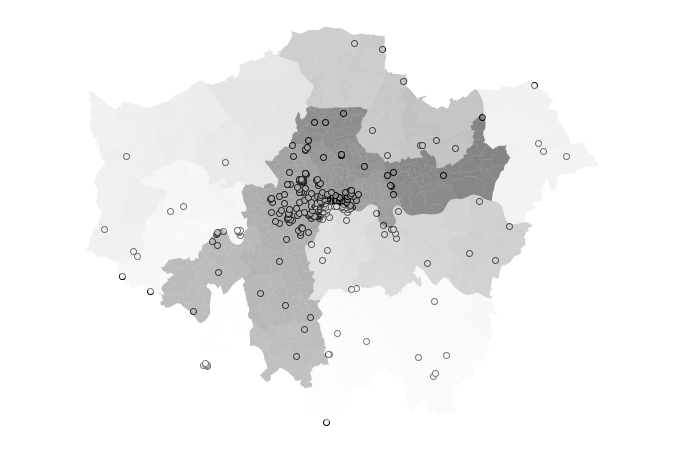

In [ ]:
# Plot the greenspace centroid
fig, ax = plt.subplots(figsize=(12, 8))

tourism_centroid.plot(alpha=1,
                         color="white",
                         edgecolor="black",
                         ax=ax,
                        label = 'Greenspace \nLocations'
                    )

londonward.plot(cmap='Greys',
                       ax=ax,
                       alpha=.5)

ax.set_axis_off()
plt.axis('equal')

plt.show()

#### Defining tourism attraction centroid in each ward

First we calculate the points inside the ward area polygon. Since we dont have the same attributes to join, we use spatial join and define every centroids within each ward polygon

Reference: 
https://geopandas.org/en/latest/docs/user_guide/mergingdata.html https://stackoverflow.com/questions/71579502/merging-pandas-file-with-osmnx

In [ ]:
tourism_in_ward = tourism_centroid.sjoin(londonward, how="inner", predicate='intersects')

tourism_in_ward.head()

name     tourism  \
element_type osmid                                                      
node         7574982627  Southernmost Point of Gtr London  attraction   
way          825382682               The Brixton Windmill  attraction   
node         5411143721              Thames River Cruises  attraction   
             3747143401                     William Bligh  attraction   
             5018732921              House of Vans London  attraction   

                                              geometry  index_right  \
element_type osmid                                                    
node         7574982627  POINT (530898.802 155854.283)           19   
way          825382682   POINT (530460.423 174362.209)          219   
node         5411143721  POINT (530487.954 179007.805)          229   
             3747143401  POINT (531242.677 179229.974)          229   
             5018732921  POINT (530991.388 179645.912)          229   

                                 NAME   GSS_CODE DISTRICT  LAGSSCODE  \
element_type osmid                                                     
node         7574982627  Old Coulsdon  E05011474  Croydon  E09000008   
way          825382682   Brixton Hill  E05000417  Lambeth  E09000022   
node         5411143721      Bishop's  E05000416  Lambeth  E09000022   
             3747143401      Bishop's  E05000416  Lambeth  E09000022   
             5018732921      Bishop's  E05000416  Lambeth  E09000022   

                         HECTARES  NONLD_AREA  
element_type osmid                             
node         7574982627   693.502       0.000  
way          825382682    113.124       0.000  
node         5411143721   153.959      30.258  
             3747143401   153.959      30.258  
             5018732921   153.959      30.258

#### Counting the number of tourism attraction in each ward

We counted the number of tourism attraction in each London ward to use it as a variable in finding the relationship between tourists' preference and tourism attraction. 

In [ ]:
# Counting greenspace centroids by ward
tourism_by_ward = tourism_in_ward.groupby("GSS_CODE").size()

# Checking
tourism_by_ward.head(5)

GSS_CODE
E05000026    1
E05000029    1
E05000102    1
E05000108    1
E05000111    1
dtype: int64

In [ ]:
# Assign counts into a table of its own 
# and joins it to the areas table
tourism_count_ward = londonward.join(
    pd.DataFrame({"tourism_attraction_total": tourism_by_ward}),
    on="GSS_CODE"
)

tourism_count_ward.head(5)

,NAME,GSS_CODE,DISTRICT,LAGSSCODE,HECTARES,NONLD_AREA,geometry,tourism_attraction_total
0,Chessington South,E05000405,Kingston upon Thames,E09000021,755.173,0.0,"MULTIPOLYGON (((516401.596 160201.802, 516407....",7.0
1,Tolworth and Hook Rise,E05000414,Kingston upon Thames,E09000021,259.464,0.0,"MULTIPOLYGON (((519552.998 164295.600, 519508....",NaN
2,Berrylands,E05000401,Kingston upon Thames,E09000021,145.390,0.0,"MULTIPOLYGON (((518107.499 167303.399, 518114....",NaN
3,Alexandra,E05000400,Kingston upon Thames,E09000021,268.506,0.0,"MULTIPOLYGON (((520336.700 165105.498, 520332....",NaN
4,Beverley,E05000402,Kingston upon Thames,E09000021,187.821,0.0,"MULTIPOLYGON (((521201.203 169275.505, 521204....",NaN


In [ ]:
# Convert NA values to 0


/opt/conda/lib/python3.10/site-packages/mapclassify/classifiers.py:238: UserWarning: Warning: Not enough unique values in array to form k classes
  Warn(
/opt/conda/lib/python3.10/site-packages/mapclassify/classifiers.py:241: UserWarning: Warning: setting k to 3
  Warn("Warning: setting k to %d" % k_q, UserWarning)


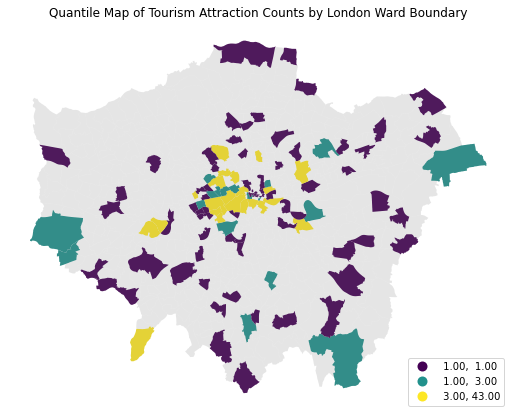

In [ ]:
# Set up figure and axis
f, ax = plt.subplots(1, figsize=(9, 9))
# Plot the equal interval choropleth and add a legend
tourism_count_ward.plot(
    column='tourism_attraction_total', 
    scheme='quantiles', 
    ax=ax,
    legend=True,
    legend_kwds={"loc": 4}
)
# Remove the axes
ax.set_axis_off()
# Set the title
ax.set_title("Quantile Map of Tourism Attraction Counts by London Ward Boundary")
# Add london ward basemap
londonward.plot(color='grey',
                       ax=ax,
                       alpha=.2)
# Draw map
plt.show()

In [ ]:
# Saving the tourism attraction total counts by ward data into local path
path = os.path.join('data')
filenm = 'tourism_attraction.csv'

if not os.path.exists(path):
    print(f"Creating {path} under {os.getcwd()}")
    os.makedirs(path)
    
tourism_count_ward.to_csv(os.path.join(path,filenm), index=False)
print("Done.")

Done.


After storing the data into local path, we push the data to [github remote repository](https://github.com/JinJiang22/fsds_GroupWork/blob/main/data/tourism_attraction.csv). Then we read the file through the URL to be analysed.

In [ ]:
# Read the file from github repo URL
url = "https://raw.githubusercontent.com/JinJiang22/fsds_GroupWork/main/data/tourism_attraction.csv"
ta_df = pd.read_csv(url)

ta_df.head(5)

,NAME,GSS_CODE,DISTRICT,LAGSSCODE,HECTARES,NONLD_AREA,geometry,tourism_attraction_total
0,Chessington South,E05000405,Kingston upon Thames,E09000021,755.173,0.0,MULTIPOLYGON (((516401.59596424643 160201.8020...,7.0
1,Tolworth and Hook Rise,E05000414,Kingston upon Thames,E09000021,259.464,0.0,MULTIPOLYGON (((519552.9984840818 164295.60020...,NaN
2,Berrylands,E05000401,Kingston upon Thames,E09000021,145.390,0.0,MULTIPOLYGON (((518107.4991065815 167303.39923...,NaN
3,Alexandra,E05000400,Kingston upon Thames,E09000021,268.506,0.0,MULTIPOLYGON (((520336.6997870404 165105.49837...,NaN
4,Beverley,E05000402,Kingston upon Thames,E09000021,187.821,0.0,MULTIPOLYGON (((521201.2026888144 169275.50472...,NaN


### Greenspace Data

#### Clipping the Greenspace Data

As mentioned before, the data included four tiles that covered London nearby areas. Now we need to clip our data with London Boundary because our study case location is London.

In [ ]:
# check if they are in the same crs
print("greenspace", greenspace_gdf.crs)
print("londonward", londonward.crs)

greenspace epsg:27700
londonward epsg:27700


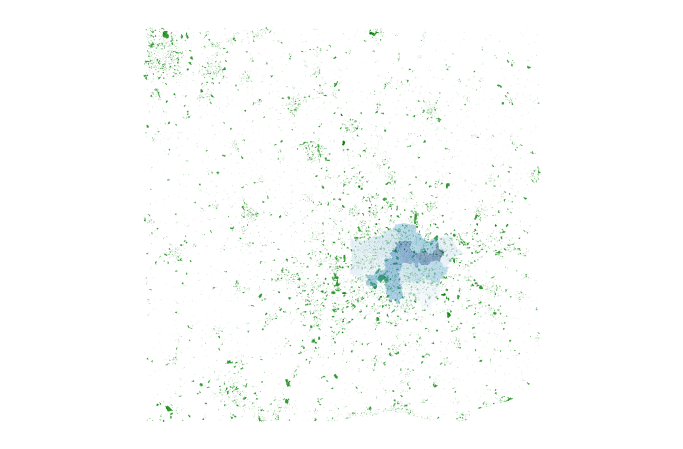

In [ ]:
# Plot the data
fig, ax = plt.subplots(figsize=(12, 8))

greenspace_gdf.plot(alpha=.8,
                        color="green",
                         ax=ax,
                    )

londonward.plot(cmap='Blues',
                       ax=ax,
                       alpha=.5,
                    )

plt.axis('equal')
ax.set_axis_off()
plt.show()

In [ ]:
# Clip the data using GeoPandas clip
greenspace_clip = gpd.clip(greenspace_gdf, londonward)

# View the first 5 rows and a few select columns
greenspace_clip.head()

,fid,id,function,distName1,distName2,distName3,distName4,layer,path,geometry
43299,43300,E56DE6C5-31F0-13A9-E053-AAEFA00A0D0E,Other Sports Facility,None,None,None,None,TQ_GreenspaceSite,/Users/listianingrumr/Documents/CASA/FSDS/fsds...,"POLYGON Z ((535015.300 159599.140 0.000, 53501..."
43439,43440,E56DE74B-960A-13A9-E053-AAEFA00A0D0E,Religious Grounds,None,None,None,None,TQ_GreenspaceSite,/Users/listianingrumr/Documents/CASA/FSDS/fsds...,"POLYGON Z ((534311.880 160595.980 0.000, 53429..."
43443,43444,E56DE6D1-FF13-13A9-E053-AAEFA00A0D0E,Tennis Court,None,None,None,None,TQ_GreenspaceSite,/Users/listianingrumr/Documents/CASA/FSDS/fsds...,"POLYGON Z ((534415.150 160731.550 0.000, 53447..."
43446,43447,E56DE74B-9587-13A9-E053-AAEFA00A0D0E,Religious Grounds,Roman Catholic Church of the Holy Family,None,None,None,TQ_GreenspaceSite,/Users/listianingrumr/Documents/CASA/FSDS/fsds...,"POLYGON Z ((534250.500 160869.900 0.000, 53427..."
43444,43445,E56DE74B-A73D-13A9-E053-AAEFA00A0D0E,Other Sports Facility,None,None,None,None,TQ_GreenspaceSite,/Users/listianingrumr/Documents/CASA/FSDS/fsds...,"POLYGON Z ((534961.620 160872.400 0.000, 53472..."


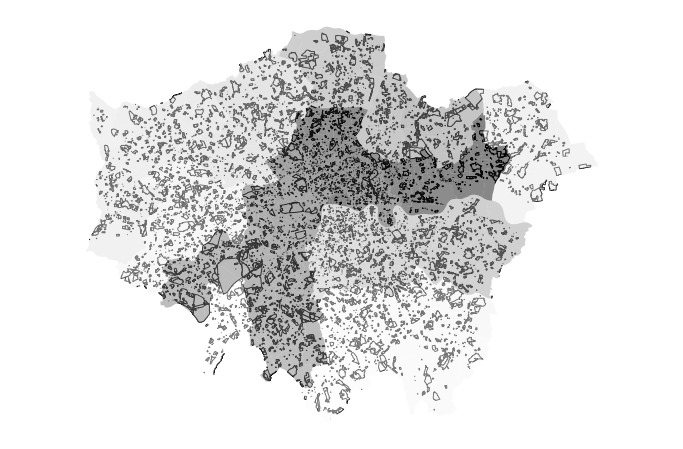

In [ ]:
# Plot the clipped data
fig, ax = plt.subplots(figsize=(12, 8))

greenspace_clip.plot(alpha=1,
                         color="white",
                         edgecolor="black",
                         ax=ax)

londonward.plot(cmap="Greys",
                       ax=ax,
                       alpha=.5)

ax.set_axis_off()
plt.axis('equal')

plt.show()

#### Calculating the Green Space Centroid

In [ ]:
# Calculating centroid of greenspace polygon and multipolygon

from shapely.geometry.polygon import Polygon
from shapely.geometry.multipolygon import MultiPolygon

greenspace_centroid = greenspace_clip

greenspace_clip['geometry'] = greenspace_clip['geometry'].apply(
  lambda x: x.centroid if type(x) == Polygon else (
  x.centroid if type(x) == MultiPolygon else x)
)

greenspace_centroid.head(5)

NameError: name 'greenspace_clip' is not defined

In [ ]:
greenspace_centroid.info(verbose=True)

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 10165 entries, 43299 to 27457
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   id         10165 non-null  object  
 1   function   10165 non-null  object  
 2   distName1  2752 non-null   object  
 3   distName2  10 non-null     object  
 4   distName3  1 non-null      object  
 5   distName4  0 non-null      object  
 6   layer      10165 non-null  object  
 7   path       10165 non-null  object  
 8   geometry   10165 non-null  geometry
dtypes: geometry(1), object(8)
memory usage: 794.1+ KB


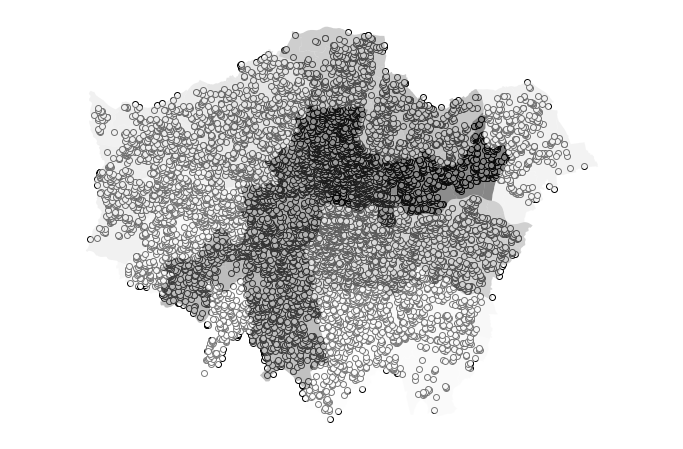

In [ ]:
# Plot the greenspace centroid
fig, ax = plt.subplots(figsize=(12, 8))

greenspace_centroid.plot(alpha=1,
                         color="white",
                         edgecolor="black",
                         ax=ax,
                        label = 'Greenspace \nLocations'
                    )

londonward.plot(cmap='Greys',
                       ax=ax,
                       alpha=.5)

ax.set_axis_off()
plt.axis('equal')

plt.show()

#### Defining Green Space Centroid in Each Ward

First we calculate the points inside the ward area polygon. Since we dont have the same attributes to join, we use spatial join and define every centroids within each ward polygon

Reference: 
https://geopandas.org/en/latest/docs/user_guide/mergingdata.html https://stackoverflow.com/questions/71579502/merging-pandas-file-with-osmnx

In [ ]:
greenspace_in_ward = greenspace_centroid.sjoin(londonward, how="inner", predicate='intersects')

greenspace_in_ward.head()

,id,function,distName1,distName2,distName3,distName4,layer,path,geometry,index_right,NAME,GSS_CODE,DISTRICT,LAGSSCODE,HECTARES,NONLD_AREA
43299,E56DE6C5-31F0-13A9-E053-AAEFA00A0D0E,Other Sports Facility,None,None,None,None,TQ_GreenspaceSite,/Users/listianingrumr/Documents/CASA/FSDS/fsds...,POINT (534996.280 159576.615),22,Sanderstead,E05011478,Croydon,E09000008,753.708,0.0
43439,E56DE74B-960A-13A9-E053-AAEFA00A0D0E,Religious Grounds,None,None,None,None,TQ_GreenspaceSite,/Users/listianingrumr/Documents/CASA/FSDS/fsds...,POINT (534278.211 160594.285),22,Sanderstead,E05011478,Croydon,E09000008,753.708,0.0
43443,E56DE6D1-FF13-13A9-E053-AAEFA00A0D0E,Tennis Court,None,None,None,None,TQ_GreenspaceSite,/Users/listianingrumr/Documents/CASA/FSDS/fsds...,POINT (534507.096 160783.952),22,Sanderstead,E05011478,Croydon,E09000008,753.708,0.0
43446,E56DE74B-9587-13A9-E053-AAEFA00A0D0E,Religious Grounds,Roman Catholic Church of the Holy Family,None,None,None,TQ_GreenspaceSite,/Users/listianingrumr/Documents/CASA/FSDS/fsds...,POINT (534239.463 160835.475),22,Sanderstead,E05011478,Croydon,E09000008,753.708,0.0
43444,E56DE74B-A73D-13A9-E053-AAEFA00A0D0E,Other Sports Facility,None,None,None,None,TQ_GreenspaceSite,/Users/listianingrumr/Documents/CASA/FSDS/fsds...,POINT (534801.546 160893.843),22,Sanderstead,E05011478,Croydon,E09000008,753.708,0.0


In [ ]:
greenspace_in_ward.info(verbose=True)

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 10157 entries, 43299 to 30112
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   id           10157 non-null  object  
 1   function     10157 non-null  object  
 2   distName1    2746 non-null   object  
 3   distName2    10 non-null     object  
 4   distName3    1 non-null      object  
 5   distName4    0 non-null      object  
 6   layer        10157 non-null  object  
 7   path         10157 non-null  object  
 8   geometry     10157 non-null  geometry
 9   index_right  10157 non-null  int64   
 10  NAME         10157 non-null  object  
 11  GSS_CODE     10157 non-null  object  
 12  DISTRICT     10157 non-null  object  
 13  LAGSSCODE    10157 non-null  object  
 14  HECTARES     10157 non-null  float64 
 15  NONLD_AREA   10157 non-null  float64 
dtypes: float64(2), geometry(1), int64(1), object(12)
memory usage: 1.3+ MB


#### Counting The Number of Green Spaces in Each Ward

We counted the number of green space in each London ward to use it as a variable in finding the relationship between tourism preference and greenspace. 

In [ ]:
# Counting greenspace centroids by ward
greenspace_by_ward = greenspace_in_ward.groupby("GSS_CODE").size()

In [ ]:
# Checking
greenspace_by_ward.head(5)

GSS_CODE
E05000026    11
E05000027     7
E05000028     5
E05000029    15
E05000030     6
dtype: int64

In [ ]:
# Assign counts into a table of its own 
# and joins it to the areas table
greenspace_count_ward = londonward.join(
    pd.DataFrame({"greenspace_count": greenspace_by_ward}),
    on="GSS_CODE"
)

greenspace_count_ward.head(5)

,NAME,GSS_CODE,DISTRICT,LAGSSCODE,HECTARES,NONLD_AREA,geometry,greenspace_count
0,Chessington South,E05000405,Kingston upon Thames,E09000021,755.173,0.0,"MULTIPOLYGON (((516401.596 160201.802, 516407....",22.0
1,Tolworth and Hook Rise,E05000414,Kingston upon Thames,E09000021,259.464,0.0,"MULTIPOLYGON (((519552.998 164295.600, 519508....",8.0
2,Berrylands,E05000401,Kingston upon Thames,E09000021,145.390,0.0,"MULTIPOLYGON (((518107.499 167303.399, 518114....",12.0
3,Alexandra,E05000400,Kingston upon Thames,E09000021,268.506,0.0,"MULTIPOLYGON (((520336.700 165105.498, 520332....",23.0
4,Beverley,E05000402,Kingston upon Thames,E09000021,187.821,0.0,"MULTIPOLYGON (((521201.203 169275.505, 521204....",17.0


NameError: name 'cx' is not defined

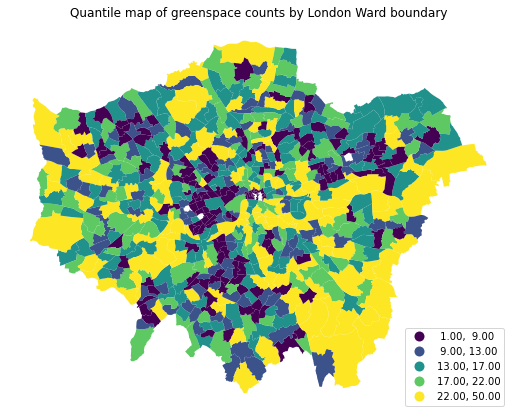

In [ ]:
# Set up figure and axis
f, ax = plt.subplots(1, figsize=(9, 9))
# Plot the equal interval choropleth and add a legend
greenspace_count_ward.plot(
    column='greenspace_count', 
    scheme='quantiles', 
    ax=ax,
    legend=True,
    legend_kwds={"loc": 4}
)
# Remove the axes
ax.set_axis_off()
# Set the title
ax.set_title("Quantile map of greenspace counts by London Ward boundary")
# Add dark basemap
cx.add_basemap(
    ax, 
    crs="EPSG:27700",
    source=cx.providers.CartoDB.DarkMatterNoLabels
)
# Draw map
plt.show()

In [ ]:
# Saving the greenspace total count by ward data into local path
path = os.path.join('data')
filenm = 'greenspace.csv'

if not os.path.exists(path):
    print(f"Creating {path} under {os.getcwd('/Users/listianingrumr/Documents/CASA/FSDS/fsds_assess')}")
    os.makedirs(path)
    
greenspace_count_ward.to_csv(os.path.join(path,filenm), index=False)
print("Done.")

Done.


In [ ]:
# Read the file from github repo URL
url = "https://raw.githubusercontent.com/JinJiang22/fsds_GroupWork/main/data/greenspace.csv"
greenspace = pd.read_csv(url)

greenspace.head(5)

,NAME,GSS_CODE,DISTRICT,LAGSSCODE,HECTARES,NONLD_AREA,geometry,greenspace_count
0,Chessington South,E05000405,Kingston upon Thames,E09000021,755.173,0.0,MULTIPOLYGON (((516401.59596424643 160201.8020...,22.0
1,Tolworth and Hook Rise,E05000414,Kingston upon Thames,E09000021,259.464,0.0,MULTIPOLYGON (((519552.9984840818 164295.60020...,8.0
2,Berrylands,E05000401,Kingston upon Thames,E09000021,145.390,0.0,MULTIPOLYGON (((518107.4991065815 167303.39923...,12.0
3,Alexandra,E05000400,Kingston upon Thames,E09000021,268.506,0.0,MULTIPOLYGON (((520336.6997870404 165105.49837...,23.0
4,Beverley,E05000402,Kingston upon Thames,E09000021,187.821,0.0,MULTIPOLYGON (((521201.2026888144 169275.50472...,17.0


## Airbnb data (Pre-precessing)

Aim: our dependent variable which represents the tourists' area(?) preference on choosing accommondation. 
It would be the estimates bookings of Airbnb listings in each area.

Workflow: 

    1. to get the number of review of all the listing has in the last 12 months,
    
    2. and calculate the estimates bookings for each Airbnb listings in the last 12 months according to review rate in London.
    
    3. ...sum up or times _an average length of stay_ (e.g. 5.5 nights)

In [301]:
IA_2022[['latitude','longitude']]

,latitude,longitude
0,51.56861,-0.11270
1,51.48780,-0.16813
2,51.52851,-0.07426
3,51.52874,-0.05396
4,51.52195,-0.14094
...,...,...
69353,51.48300,-0.01346
69354,51.50914,-0.10192
69355,51.40571,-0.35325
69356,51.41029,-0.35975


### read in data

In [302]:
IA_2022 = pd.read_csv('./data/2022-09-10-listings.csv.gz',compression='gzip',low_memory=False)
IA_2022.info()
# we need to filter out the columns.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69358 entries, 0 to 69357
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            69354 non-null  object 
 1   listing_url                                   69357 non-null  object 
 2   scrape_id                                     69357 non-null  object 
 3   last_scraped                                  69357 non-null  object 
 4   source                                        69358 non-null  object 
 5   name                                          69337 non-null  object 
 6   description                                   67839 non-null  object 
 7   neighborhood_overview                         39966 non-null  object 
 8   picture_url                                   69358 non-null  object 
 9   host_id                                       69358 non-null 

In [303]:
IA_2019 = pd.read_csv('./data/London-2019-11-listings.csv',low_memory=False)
IA_2019.info()
# we need to fix the data type.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85236 entries, 0 to 85235
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   id                              85236 non-null  object
 1   name                            85236 non-null  object
 2   host_id                         85236 non-null  object
 3   host_name                       85236 non-null  object
 4   neighbourhood_group             85236 non-null  object
 5   neighbourhood                   85236 non-null  object
 6   latitude                        85236 non-null  object
 7   longitude                       85236 non-null  object
 8   room_type                       85236 non-null  object
 9   price                           85236 non-null  object
 10  minimum_nights                  85236 non-null  object
 11  number_of_reviews               85236 non-null  object
 12  last_review                     85236 non-null

### clean data

In [304]:
# select the column we need
df_raw1 = IA_2022
df_raw2 = IA_2019
print(df_raw1.columns.to_list())
print(df_raw2.columns.to_list())

['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name', 'description', 'neighborhood_overview', 'picture_url', 'host_id', 'host_url', 'host_name', 'host_since', 'host_location', 'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_listings_count', 'host_total_listings_count', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude', 'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'calendar_updated', 'has_availability', 'availability_30', 'availability_60', 'availability_90', 'availabil

In [305]:
IA_2019.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,room_class,last_review_timestamp
0,9582415,Single/Twin/Double Ensuite near Twickenham Sta...,49602995,Daniela,,Richmond upon Thames,51.44473,-0.379,Private room,35,1,47.00,2019/11/6,2.27,1,278,Private room,11/6/2019 0:00:00
1,23013522,"Spacious room with double bed for 2, Twickenham",70374572,Monk,,Hounslow,51.45867,-0.34444,Private room,19,1,131.00,2019/11/6,6.52,3,23,Private room,11/6/2019 0:00:00
2,25796711,Stunning Central London Apartment Close The River,25587547,Matthew,,Hammersmith and Fulham,51.47398,-0.21531,Entire home/apt,103,7,8.00,2019/11/6,0.51,1,317,Entire home/apt,11/6/2019 0:00:00
3,29060134,Recently renovated fabulous four bedroom house,57607790,Shofraz,,Hillingdon,51.52716,-0.44164,Entire home/apt,85,14,5.00,2019/11/6,0.40,1,346,Entire home/apt,11/6/2019 0:00:00
4,30374086,Lovely cosy flat for 4 in Heart of North London,228095684,Yashar,,Barnet,51.59118,-0.1667,Entire home/apt,85,3,16.00,2019/11/6,1.52,3,139,Entire home/apt,11/6/2019 0:00:00


#### filter out the columns (2022 dataset)

In [306]:
# select the columns we may need. All fields about review are reserved.
cols = ['id', 'listing_url', 'last_scraped', 'name', 'description', 'host_id', 'host_name', 
        'host_since','host_listings_count', 'host_total_listings_count', 
        'latitude', 'longitude', 'property_type', 'room_type', 'accommodates', 
        'amenities', 'price', 'minimum_nights', 'maximum_nights','minimum_minimum_nights', 'availability_365', 
        'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d', 'first_review', 'last_review', 
        'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 
        'review_scores_communication', 'review_scores_location', 'review_scores_value', 'license', 'reviews_per_month']

In [307]:
df1 = df_raw1[cols]
#df1.sample(5)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69358 entries, 0 to 69357
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           69354 non-null  object 
 1   listing_url                  69357 non-null  object 
 2   last_scraped                 69357 non-null  object 
 3   name                         69337 non-null  object 
 4   description                  67839 non-null  object 
 5   host_id                      69358 non-null  float64
 6   host_name                    69353 non-null  object 
 7   host_since                   69353 non-null  object 
 8   host_listings_count          69346 non-null  object 
 9   host_total_listings_count    69345 non-null  float64
 10  latitude                     69351 non-null  float64
 11  longitude                    69351 non-null  float64
 12  property_type                69351 non-null  object 
 13  room_type       

In [308]:
df1.sample(5)[['latitude','longitude', 'property_type', 'minimum_nights','number_of_reviews', 'number_of_reviews_ltm']]

,latitude,longitude,property_type,minimum_nights,number_of_reviews,number_of_reviews_ltm
19388,51.51264,-0.07940,Entire rental unit,2,37.0,0.0
50971,51.45165,-0.06533,Private room in home,2,1.0,1.0
11218,51.52887,-0.08756,Entire rental unit,1,63.0,2.0
24692,51.53059,-0.12201,Private room in rental unit,1,195.0,50.0
39763,51.55480,-0.22470,Private room in rental unit,1,0.0,0.0


#### fixing data type (2019 dataset)

In [309]:
df2 = IA_2019

In [310]:
df2['reviews_per_month']

0        2.27 
1        6.52 
2        0.51 
3        0.40 
4        1.52 
         ...  
85231         
85232         
85233         
85234         
85235         
Name: reviews_per_month, Length: 85236, dtype: object

In [311]:
# there was some empty string in the dataset...
df2 = df2.replace(r'^\s*$', np.nan, regex=True)

In [312]:
# transfer "object" to numeric 
ints  = ['latitude', 'longitude', 'price', 
         'number_of_reviews', 'reviews_per_month','minimum_nights']
for i in ints:
    print(f"Converting {i}")
    df2[i] = df2[i].astype('float')

Converting latitude
Converting longitude
Converting price
Converting number_of_reviews
Converting reviews_per_month
Converting minimum_nights


In [313]:
# check that they have been changed to float
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85236 entries, 0 to 85235
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              85068 non-null  object 
 1   name                            85056 non-null  object 
 2   host_id                         84912 non-null  object 
 3   host_name                       84900 non-null  object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   84911 non-null  object 
 6   latitude                        84911 non-null  float64
 7   longitude                       84911 non-null  float64
 8   room_type                       84911 non-null  object 
 9   price                           84911 non-null  float64
 10  minimum_nights                  84911 non-null  float64
 11  number_of_reviews               84911 non-null  float64
 12  last_review                     

#### listings with missing values

##### check the missing values

keep "0-review" listings.

In [314]:
df1.isna().sum(axis=0).sort_values(ascending=False)[:12]

license                        69358
review_scores_value            17849
review_scores_checkin          17848
review_scores_location         17846
review_scores_communication    17815
review_scores_accuracy         17814
review_scores_cleanliness      17801
review_scores_rating           16792
reviews_per_month              16792
last_review                    16787
first_review                   16785
description                     1519
dtype: int64

In [315]:
df1[df1['number_of_reviews_ltm'].isna()]

,id,listing_url,last_scraped,name,description,host_id,host_name,host_since,host_listings_count,host_total_listings_count,...,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,reviews_per_month
9103,10128178,https://www.airbnb.com/rooms/10128178,2022-09-11,Homely flat in Central Haggerston/Shoreditch,This is a lived in apartment with two medium s...,233649.0,Michelle,2010-09-13,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23112,22063217,https://www.airbnb.com/rooms/22063217,2022-09-12,Beautiful Vintage Apartment - BRICK LANE,<b>The space</b><br />Parejas,1824036.0,Arya,2012-02-28,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52563,53422816,https://www.airbnb.com/rooms/53422816,2022-09-11,"Spacious, central 1-bed flat in Zone 2 East Lo...",We've newly refurbished our 1-bed apartment fo...,30626999.0,Sitara,2015-04-05,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53487,53899858,https://www.airbnb.com/rooms/53899858,2022-09-12,Large 1 bed flat - Haggerston station/Shoreditch,Enjoy a stylish experience at this centrally-l...,233649.0,Michelle,2010-09-13,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
63388,670608541728038282,https://www.airbnb.com/rooms/670608541728038282,2022-09-11,Stunning one bedroom flat in London fields,A beautifully renovated Victorian flat on the ...,7969940.0,Jenny,2013-08-06,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64775,680821702646368182,https://www.airbnb.com/rooms/680821702646368182,2022-09-11,Cozy studio in the heart of Angel with garden.,Welcome to my lovely studio located in the hea...,8029384.0,Melania,2013-08-08,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66384,694611321916822413,https://www.airbnb.com/rooms/694611321916822413,2022-09-11,Perfect one bed in London Fields,"Kick back and relax in this calm, stylish spac...",7969940.0,Jenny,2013-08-06,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


There is 7 null values in column 'number_of_reviews_ltm' in IA_2022. After opening the Airbnb page for each listings, we can see they are active listings in operation and also have reviews. We assumpt that the value were losen for some unknown technical problem while scraping. However they make up a very small part of the dataset. 

Therefore, these listings would be dropped.

In [316]:
df2.isnull().sum(axis=0).sort_values(ascending=False)

neighbourhood_group               85236
last_review_timestamp             20298
reviews_per_month                 20298
last_review                       20298
host_name                           336
minimum_nights                      325
availability_365                    325
calculated_host_listings_count      325
number_of_reviews                   325
price                               325
room_type                           325
longitude                           325
latitude                            325
neighbourhood                       325
host_id                             324
name                                180
id                                  168
room_class                            0
dtype: int64

In [317]:
no_rev_2019 = df2[df2['reviews_per_month'].isna()]
no_rev_2019

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,room_class,last_review_timestamp
64938,38151,Double room/ lounge,163634,Lisa,NaN,Croydon,51.41940,-0.08722,Private room,65.0,1.0,0.0,NaN,NaN,1,365,Private room,NaN
64939,38950,Room 1 Large Double Bedroom - front ground floor,167107,Paul,NaN,Haringey,51.58730,-0.08606,Private room,45.0,1.0,0.0,NaN,NaN,4,90,Private room,NaN
64940,38995,ROOM IN CONTEMPORARY STYLE FLAT,167281,C,NaN,Southwark,51.47892,-0.06040,Private room,45.0,1.0,0.0,NaN,NaN,1,87,Private room,NaN
64941,40228,Room 4 Cosy Double Bedroom on First Floor,167107,Paul,NaN,Haringey,51.58860,-0.08805,Private room,29.0,1.0,0.0,NaN,NaN,4,45,Private room,NaN
64942,96008,Light airy double bedroom for rent,510424,Dionne,NaN,Lambeth,51.43923,-0.10421,Private room,80.0,2.0,0.0,NaN,NaN,1,365,Private room,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85231,39868875,"The Apartment, East London Village",13553423,Melissa,NaN,Waltham Forest,51.58208,-0.00915,Entire home/apt,70.0,3.0,0.0,NaN,NaN,1,88,Entire home/apt,NaN
85232,39869123,Elegant stylish modern house with amazing view!,21145791,Ingrid,NaN,Merton,51.40628,-0.23244,Private room,69.0,2.0,0.0,NaN,NaN,2,113,Private room,NaN
85233,39869214,Holland Road - Kensington Olympia,251922260,Christian,NaN,Hammersmith and Fulham,51.50244,-0.21547,Entire home/apt,90.0,3.0,0.0,NaN,NaN,4,63,Entire home/apt,NaN
85234,39869249,Functional single room 18 min to London Bridge,255372486,Nudrat,NaN,Bromley,51.35742,0.10764,Private room,30.0,2.0,0.0,NaN,NaN,4,1,Private room,NaN


In [318]:
# mapping these listings
df_t = no_rev_2019

In [319]:
gdf = gpd.GeoDataFrame(df_t, 
      geometry=gpd.points_from_xy(df_t.longitude, df_t.latitude, crs='epsg:4326'))

In [320]:
print(f"The bottom-left corner is {df_t.longitude.min()}, {df_t.latitude.min()}")
print(f"The top-right corner is {df_t.longitude.max()}, {df_t.latitude.max()}")

The bottom-left corner is -0.49668, 51.29813
The top-right corner is 0.28539, 51.67651


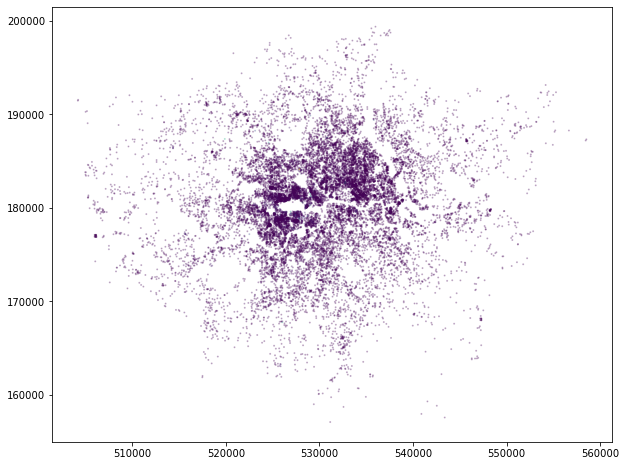

In [321]:
gdf.to_crs('EPSG: 27700').plot(column='price', cmap='viridis', alpha=0.25, markersize=1, figsize=(12,8));

There are 20298 missing values in column 'reviews_per_month' in IA_2019. Obviously, We are not able to check each listing manually. 

Yet from the date frame table, it seems like they are a large number of listings which have no review at all but have other normal information, such as various room types and different prices. Can the 'no review' be evidence of inactiveness? Maybe they are just “part-time” Airbnb houses and have little bookings. 

Considering our aim is to calculate the occupancy rate for each listing and get the average occupancy rate for all the listings in each ward to represent the tourist’s preference, the amount of listings would affect the result directly. 

Additionaly, on the map above, it's shown that these listings locate around London.

Therefore, these ‘0-review’ listings are reserved and whose number of review/occupancy rate would be calculated as zero.

##### deal with df1 (2022 dataset)

In [322]:
# drop rows in df1 (2022 dataset)
df1.drop(df1[df1.number_of_reviews_ltm.isna()].index.array, axis=0, inplace=True)
# check
df1[df1.number_of_reviews_ltm.isna()]

/tmp/ipykernel_313/3931092351.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop(df1[df1.number_of_reviews_ltm.isna()].index.array, axis=0, inplace=True)


,id,listing_url,last_scraped,name,description,host_id,host_name,host_since,host_listings_count,host_total_listings_count,...,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,reviews_per_month


##### deal with df2 (2019 dataset)

In [323]:
df2.columns.get_loc("reviews_per_month")

13

In [324]:
df2.columns.get_loc("number_of_reviews")

11

In [325]:
# set 0 value to 'reviews_per_month' field for these "no-review" listings in df2 (2019 dataset)
# but there should be a more reproducable way to define rows with NA. For example, used the index of rows with NA.
df2.iloc[64938:85236,13] = 0

In [326]:
# check
df2.reviews_per_month.isna().sum()

0

### the occupancy rate

The Occupancy Model is constructed by following the modified methodology from Inside Airbnb and ...

1. review rate

A review rate of 50% is used to convert reviews to estimated bookings.

2. The average length of stay
The average length of stay is assumed as 5.3 days in this study and is taken from the Airbnb report and London first report.
Airbnb reported 5.4 nights as the average length of stay for guests using Airbnb in London, but the study examined data from November 2012 to October 2013.
London First study gave a figure of 5.3 nights on the average length of stay for international guests using Airbnb accommodation in London in 2019.

3. If a listing has a higher minimum nights value than the average length of stay, the minimum nights value was used instead.

#### (fail) test


In [327]:
df_t_min._get_value(1, 'minimum_nights') 

1.0

In [328]:
df_t_min = df2.head(50) 
df_t_min.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,room_class,last_review_timestamp
0,9582415,Single/Twin/Double Ensuite near Twickenham Sta...,49602995,Daniela,NaN,Richmond upon Thames,51.44473,-0.37900,Private room,35.0,1.0,47.0,2019/11/6,2.27,1,278,Private room,11/6/2019 0:00:00
1,23013522,"Spacious room with double bed for 2, Twickenham",70374572,Monk,NaN,Hounslow,51.45867,-0.34444,Private room,19.0,1.0,131.0,2019/11/6,6.52,3,23,Private room,11/6/2019 0:00:00
2,25796711,Stunning Central London Apartment Close The River,25587547,Matthew,NaN,Hammersmith and Fulham,51.47398,-0.21531,Entire home/apt,103.0,7.0,8.0,2019/11/6,0.51,1,317,Entire home/apt,11/6/2019 0:00:00
3,29060134,Recently renovated fabulous four bedroom house,57607790,Shofraz,NaN,Hillingdon,51.52716,-0.44164,Entire home/apt,85.0,14.0,5.0,2019/11/6,0.40,1,346,Entire home/apt,11/6/2019 0:00:00
4,30374086,Lovely cosy flat for 4 in Heart of North London,228095684,Yashar,NaN,Barnet,51.59118,-0.16670,Entire home/apt,85.0,3.0,16.0,2019/11/6,1.52,3,139,Entire home/apt,11/6/2019 0:00:00


#### (fail) minimum night

<AxesSubplot:>

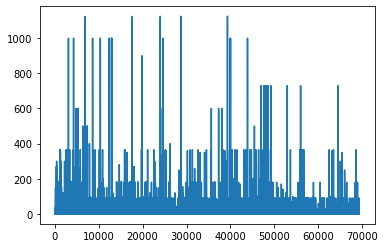

In [329]:
df1.minimum_minimum_nights.plot.line()

<AxesSubplot:>

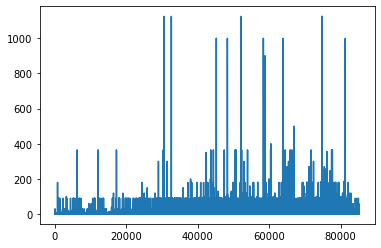

In [332]:
df2.minimum_nights.plot.line()

#### (not final) calculate

In [333]:
review_rate = 0.5
length_stay = 5.3

# Airbnb 2022 
df1['total_bookings_2022'] = df1['number_of_reviews_ltm']/ review_rate
df1['occupancy_rate_2022'] = df1['total_bookings_2022'] * length_stay/ 365
df1[['occupancy_rate_2022','total_bookings_2022','number_of_reviews_ltm']]

/tmp/ipykernel_313/804496696.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['total_bookings_2022'] = df1['number_of_reviews_ltm']/ review_rate
/tmp/ipykernel_313/804496696.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['occupancy_rate_2022'] = df1['total_bookings_2022'] * length_stay/ 365


,occupancy_rate_2022,total_bookings_2022,number_of_reviews_ltm
0,0.261370,18.0,9.0
1,0.000000,0.0,0.0
2,0.029041,2.0,1.0
3,0.000000,0.0,0.0
4,0.232329,16.0,8.0
...,...,...,...
69353,0.029041,2.0,1.0
69354,0.348493,24.0,12.0
69355,0.174247,12.0,6.0
69356,0.116164,8.0,4.0


In [334]:
# Airbnb 2019 
df2['total_bookings_2019'] = df2['reviews_per_month']*12/review_rate
df2['occupancy_rate_2019'] = df2['total_bookings_2019'] * length_stay/ 365
df2[['occupancy_rate_2019','total_bookings_2019','number_of_reviews','reviews_per_month','minimum_nights']]

,occupancy_rate_2019,total_bookings_2019,number_of_reviews,reviews_per_month,minimum_nights
0,0.791079,54.48,47.0,2.27,1.0
1,2.272175,156.48,131.0,6.52,1.0
2,0.177732,12.24,8.0,0.51,7.0
3,0.139397,9.60,5.0,0.40,14.0
4,0.529710,36.48,16.0,1.52,3.0
...,...,...,...,...,...
85231,0.000000,0.00,0.0,0.00,3.0
85232,0.000000,0.00,0.0,0.00,2.0
85233,0.000000,0.00,0.0,0.00,3.0
85234,0.000000,0.00,0.0,0.00,2.0


### Join Airbnb listings with ward

mapping the airbnb listings in 2019, and join the value to London ward map.

#### read in geodata

In [335]:
# Add London Ward Boundary Data
londonward = gpd.read_file("./data/londonward.gpkg")

In [336]:
londonward.crs

<Derived Projected CRS: EPSG:27700>
Name: OSGB36 / British National Grid
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: United Kingdom (UK) - offshore to boundary of UKCS within 49°45'N to 61°N and 9°W to 2°E; onshore Great Britain (England, Wales and Scotland). Isle of Man onshore.
- bounds: (-9.0, 49.75, 2.01, 61.01)
Coordinate Operation:
- name: British National Grid
- method: Transverse Mercator
Datum: Ordnance Survey of Great Britain 1936
- Ellipsoid: Airy 1830
- Prime Meridian: Greenwich

<AxesSubplot:>

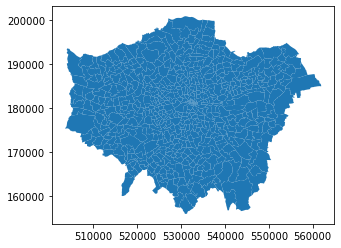

In [337]:
londonward.plot()

to match with the format of the coordinates of Londonward firstly, and transfer csv to geodata.

In [351]:
gdf_Airbnb2019 = gpd.GeoDataFrame(df2, 
      geometry=gpd.points_from_xy(df2.longitude, df2.latitude, crs='epsg:4326'))

In [352]:
for g in [gdf_Airbnb2019]:
    print(g.crs)

epsg:4326


In [360]:
print(gdf_Airbnb2019.geometry.crs)
print(gdf_Airbnb2019.total_bounds)

epsg:4326
[-0.49668 51.29479  0.28539 51.68169]


#### reproject the Airbnb

In [362]:
# check its crs
gdf_Airbnb2019 = gdf_Airbnb2019.to_crs('EPSG:27700')
print(gdf_Airbnb2019.geometry.crs)
print(gdf_Airbnb2019.total_bounds)

EPSG:27700
[504189.9384281  157077.66437635 558509.91187284 199932.45808543]


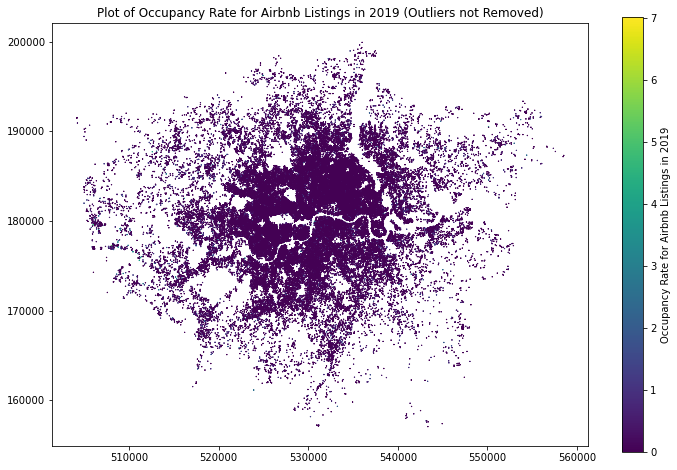

In [363]:
ax = gdf_Airbnb2019.plot(figsize=(12,8), marker='*', markersize=0.25, 
         column='occupancy_rate_2019', cmap='viridis', 
         legend=True, legend_kwds={"label": "Occupancy Rate for Airbnb Listings in 2019"});  #legend_kwds: legend keywords
ax.set_title("Plot of Occupancy Rate for Airbnb Listings in 2019");

<AxesSubplot:>

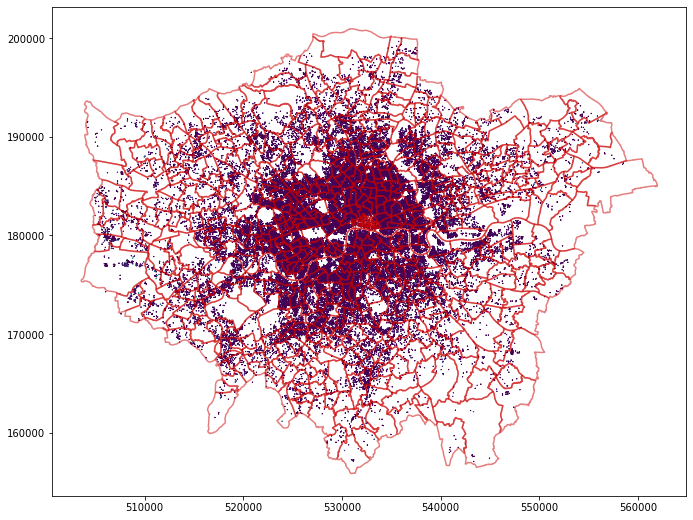

In [370]:
# Plot Airbnb listings and London ward to the same axes

# Creates a new figure with specified number of subplots and the specified size (in inches by default).
fig, ax = plt.subplots(1,1, figsize=(12,9))

gdf_Airbnb2019.plot(column='occupancy_rate_2019', marker='*', markersize=0.25, cmap='viridis', ax=ax)
londonward.plot(edgecolor=(0.8, 0, 0, 0.5), facecolor='none', linewidth=1.5, ax=ax)

#### join

In [372]:
Airbnb2019_in_ward = gdf_Airbnb2019.sjoin(londonward, how="inner", predicate='intersects')
Airbnb2019_in_ward.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,total_bookings_2019,occupancy_rate_2019,geometry,index_right,NAME,GSS_CODE,DISTRICT,LAGSSCODE,HECTARES,NONLD_AREA
0,9582415,Single/Twin/Double Ensuite near Twickenham Sta...,49602995,Daniela,NaN,Richmond upon Thames,51.44473,-0.37900,Private room,35.0,...,54.48,0.791079,POINT (512750.672 172994.812),392,Heathfield,E05000523,Richmond upon Thames,E09000027,191.058,0.0
3802,14236471,Ensuite single modern room in twickenham,86566410,Yorgo,NaN,Richmond upon Thames,51.44941,-0.36235,Private room,27.0,...,53.52,0.777140,POINT (513896.087 173540.987),392,Heathfield,E05000523,Richmond upon Thames,E09000027,191.058,0.0
4292,35463539,2 Bed Semi on 1 level Free parking Wi-Fi & Ga...,266812235,Derek,NaN,Richmond upon Thames,51.44694,-0.38079,Entire home/apt,85.0,...,38.16,0.554104,POINT (512620.848 173237.826),392,Heathfield,E05000523,Richmond upon Thames,E09000027,191.058,0.0
5224,36389486,Double Room in Lovely Home -Twickenham,30537142,Lizzette&Barnaby,NaN,Richmond upon Thames,51.44624,-0.36824,Private room,24.0,...,47.04,0.683047,POINT (513494.671 173179.332),392,Heathfield,E05000523,Richmond upon Thames,E09000027,191.058,0.0
7403,32174432,2 Bed Bungalow+garden+parking Free Wi-fi,80107186,Jenny,NaN,Richmond upon Thames,51.44810,-0.38174,Entire home/apt,85.0,...,74.64,1.083814,POINT (512551.984 173365.366),392,Heathfield,E05000523,Richmond upon Thames,E09000027,191.058,0.0


In [381]:
# calculate the average occupancy rate in each ward
aver_occup_rate_2019 = Airbnb2019_in_ward.groupby('GSS_CODE')['occupancy_rate_2019'].mean()
aver_occup_rate_2019.head()

GSS_CODE
E05000026    0.268141
E05000027    0.483161
E05000028    0.176183
E05000029    0.203076
E05000030    0.268608
Name: occupancy_rate_2019, dtype: float64

In [382]:
# join the average rate back to ward
Ward_Airbnb_2019 = londonward.merge(aver_occup_rate_2019, on='GSS_CODE', how='left')
Ward_Airbnb_2019.head()

,NAME,GSS_CODE,DISTRICT,LAGSSCODE,HECTARES,NONLD_AREA,geometry,occupancy_rate_2019
0,Chessington South,E05000405,Kingston upon Thames,E09000021,755.173,0.0,"MULTIPOLYGON (((516401.596 160201.802, 516407....",0.436313
1,Tolworth and Hook Rise,E05000414,Kingston upon Thames,E09000021,259.464,0.0,"MULTIPOLYGON (((519552.998 164295.600, 519508....",0.623028
2,Berrylands,E05000401,Kingston upon Thames,E09000021,145.390,0.0,"MULTIPOLYGON (((518107.499 167303.399, 518114....",0.215030
3,Alexandra,E05000400,Kingston upon Thames,E09000021,268.506,0.0,"MULTIPOLYGON (((520336.700 165105.498, 520332....",0.408253
4,Beverley,E05000402,Kingston upon Thames,E09000021,187.821,0.0,"MULTIPOLYGON (((521201.203 169275.505, 521204....",0.325534


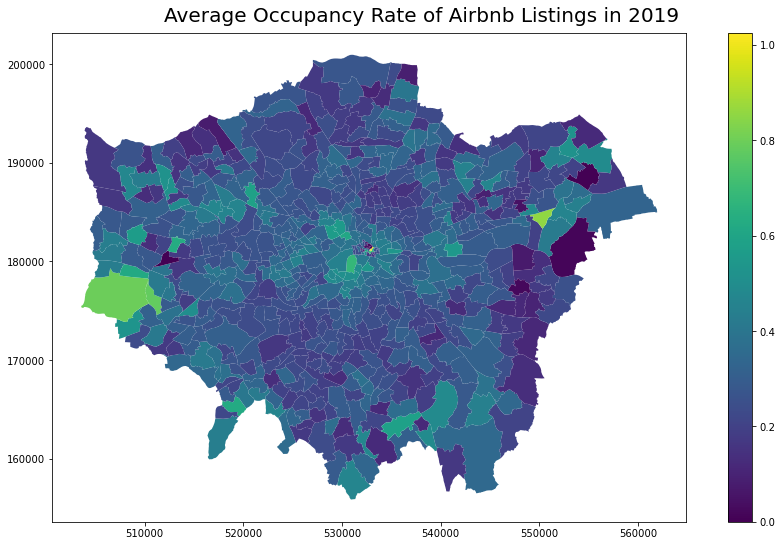

In [395]:
# Plot
fig, ax = plt.subplots(1,1, figsize=(15,9))
fig.suptitle(f"Average Occupancy Rate of Airbnb Listings in 2019", fontsize=20, y=0.92)
Ward_Airbnb_2019.plot(ax=ax, column='occupancy_rate_2019',legend=True)

# Save the image
os.makedirs('img')
plt.savefig(os.path.join('output_img','occupancy_rate_2019.png'), dpi=300)

#### TODO (2022) data not cleaned

In [346]:
gdf_Airbnb2022 = gpd.GeoDataFrame(df1, 
      geometry=gpd.points_from_xy(df1.longitude, df1.latitude, crs='epsg:4326'))

In [347]:
# junk rows need to be moved.
df1.longitude.max()

1125.0

In [348]:
print(f"The bottom-left corner is {df1.longitude.min()}, {df1.latitude.min()}")
print(f"The top-right corner is {df1.longitude.max()}, {df1.latitude.max()}")

The bottom-left corner is -0.5236, 2.0
The top-right corner is 1125.0, 51.70893


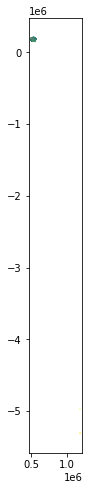

In [349]:
gdf_Airbnb2022.to_crs('EPSG: 27700').plot(column='price', cmap='viridis', alpha=0.25, markersize=1, figsize=(12,8));

In [350]:
Airbnb2022_in_ward = .sjoin(londonward, how="inner", predicate='intersects')

SyntaxError: invalid syntax (1170571185.py, line 1)